In [436]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
%matplotlib inline

In [478]:
data = np.genfromtxt('recs2009_public.csv',delimiter=',',skip_header=1)

In [480]:
data=data[0:6041]

In [481]:
TotalBTUHeating=data[:,908]

In [525]:
TotalSQFTHeating=data[:,829]

In [526]:
nonzeroarea=np.where(TotalSQFTHeating!=0)

In [484]:
HDD=data[:,6]
HDD=HDD[nonzeroarea]

In [485]:
TotalBTUHeating=TotalBTUHeating[nonzeroarea]

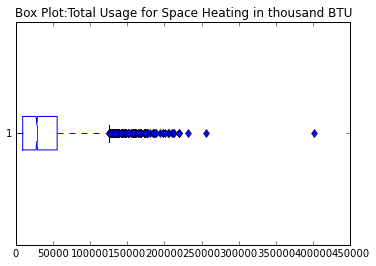

In [510]:
plt.boxplot(TotalBTUHeating,notch=True,sym='bd',vert=False)
plt.title('Box Plot:Total Usage for Space Heating in thousand BTU')

In [486]:
TotalSQFTHeating=TotalSQFTHeating[nonzeroarea]

In [487]:
BTUperSQFT=np.divide(TotalBTUHeating,TotalSQFTHeating)

In [488]:
EquipAGE=data[:,432]
EquipAGE=EquipAGE[nonzeroarea]

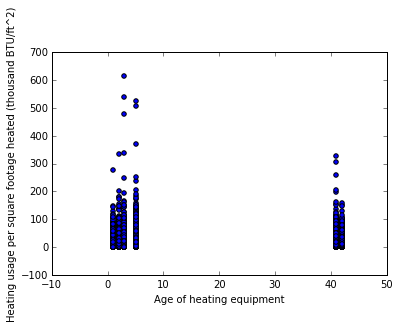

In [490]:
plt.scatter(EquipAGE,BTUperSQFT)
plt.xlabel("Age of heating equipment")
plt.ylabel("Heating usage per square footage heated (thousand BTU/ft^2)")

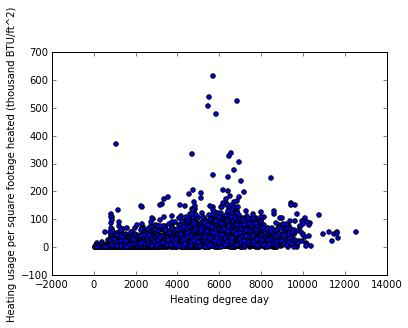

In [491]:
plt.scatter(HDD,BTUperSQFT)
plt.xlabel("Heating degree day")
plt.ylabel("Heating usage per square footage heated (thousand BTU/ft^2)")

In [492]:
one=np.ones((len(HDD),))

In [493]:
DesignMatrix=np.vstack((one,HDD,EquipAGE)).T

In [494]:
BetaMatrix=np.linalg.inv(np.dot(DesignMatrix.T,DesignMatrix)).dot(DesignMatrix.T).dot(BTUperSQFT)

In [495]:
BetaMatrix

array([ 5.22197133,  0.00524488, -0.01238289])

In [496]:
testdata=np.genfromtxt('recs2009_public.csv',delimiter=',',skip_header=1)

In [497]:
testdata=testdata[6042:12083]

In [498]:
TotalSQFTHeating_test=testdata[:,829]

In [499]:
nonzeroarea_test=np.where(TotalSQFTHeating_test!=0)

In [500]:
testdata=testdata[nonzeroarea_test]

In [501]:
p=testdata[:,1]

In [502]:
p1=np.where(p==1)
p2=np.where(p==2)
p3=np.where(p==3)
p4=np.where(p==4)

In [503]:
HDD_test=testdata[:,6]

In [504]:
EquipAGE_test=testdata[:,432]

In [505]:
testone=np.ones((len(HDD_test),))

In [506]:
DesignMatrix_test=np.vstack((testone,HDD_test,EquipAGE_test)).T

In [507]:
BTU_predict=np.dot(DesignMatrix_test,BetaMatrix)

In [508]:
TotalSQFTHeating_test=testdata[:,829]

In [511]:
TotalBTUHeating_test=testdata[:,908]

In [512]:
BTUperSQFT_test=np.divide(TotalBTUHeating_test,TotalSQFTHeating_test)

In [513]:
x1=BTU_predict[p1]
y1=BTUperSQFT_test[p1]
x2=BTU_predict[p2]
y2=BTUperSQFT_test[p2]
x3=BTU_predict[p3]
y3=BTUperSQFT_test[p3]
x4=BTU_predict[p4]
y4=BTUperSQFT_test[p4]

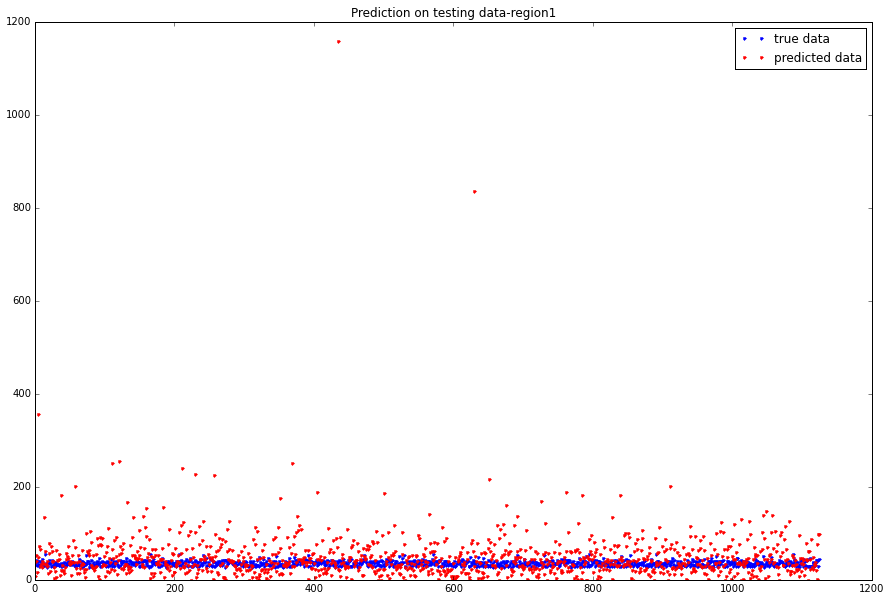

In [514]:
plt.figure(figsize=(15,10))
plt.plot(x1,'.b')
plt.plot(y1,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region1')

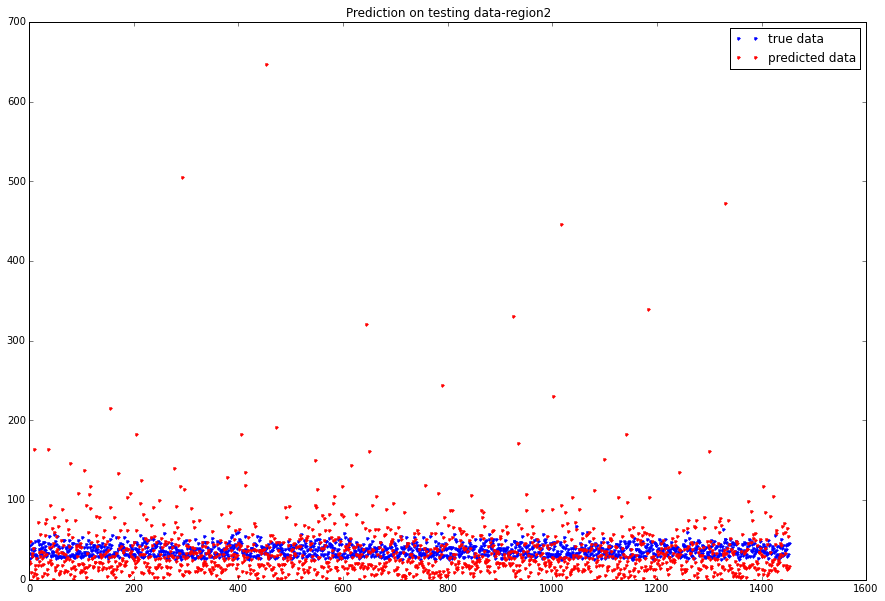

In [515]:
plt.figure(figsize=(15,10))
plt.plot(x2,'.b')
plt.plot(y2,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region2')

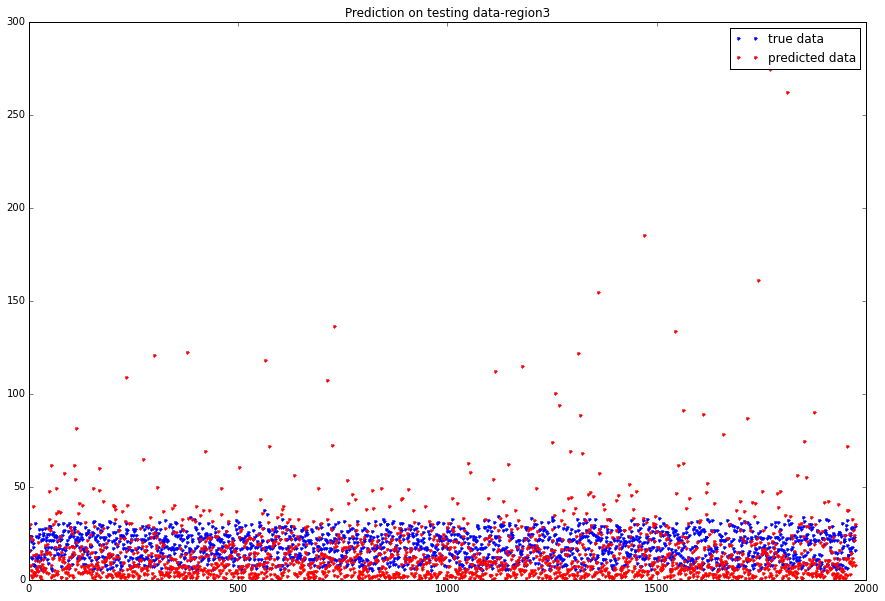

In [516]:
plt.figure(figsize=(15,10))
plt.plot(x3,'.b')
plt.plot(y3,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region3')

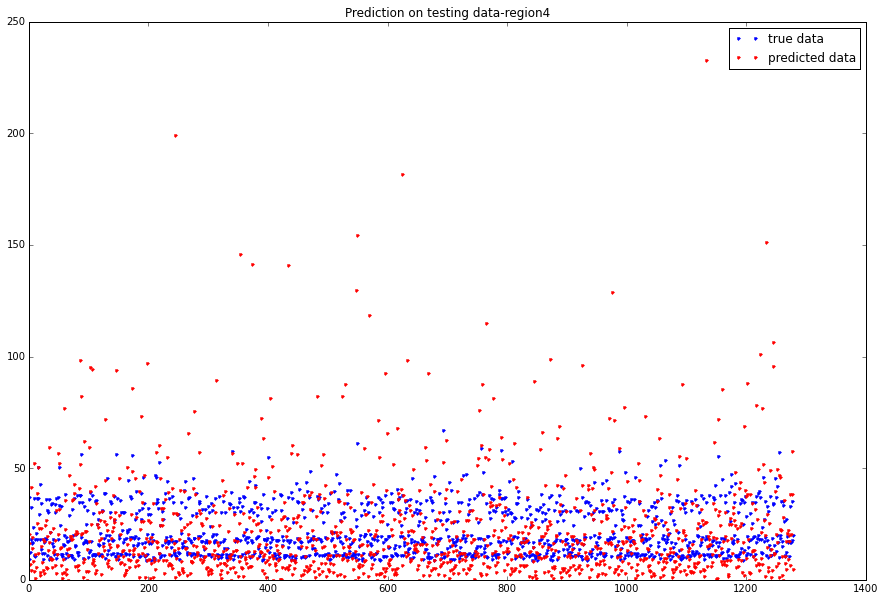

In [517]:
plt.figure(figsize=(15,10))
plt.plot(x4,'.b')
plt.plot(y4,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region4')

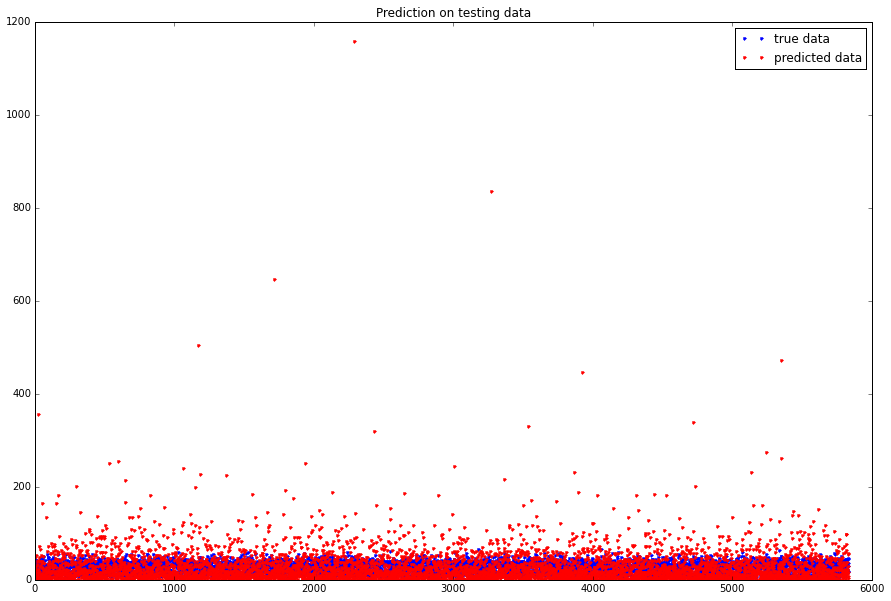

In [518]:
plt.figure(figsize=(15,10))
plt.plot(BTU_predict,'.b')
plt.plot(BTUperSQFT_test,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data')

In [519]:
def rsquare(actualData,predicted):
    distanceyline=actualData-predicted
    SSE=np.dot(np.transpose(distanceyline),distanceyline)
    ymean=np.mean(actualData)
    distancey=actualData-ymean
    SEy=np.dot(np.transpose(distancey),distancey)
    r2=1-SSE/SEy
    return r2

In [520]:
r2_region1=rsquare(y4,x4)
r2_region1

0.1248480233326309

Task 2 linear regression model 2

In [521]:
data = np.genfromtxt('recs2009_public.csv',delimiter=',',skip_header=1)

In [522]:
People=data[:,1]

In [527]:
TotalBTUHeating=data[:,908]

In [528]:
TotalSQFTHeating=data[:,829]

In [529]:
HDD=data[:,6]

In [530]:
BTUperSQFT=np.divide(TotalBTUHeating,TotalSQFTHeating)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [531]:
EquipAGE=data[:,432]

In [532]:
People1=np.where(People==1)
People2=np.where(People==2)
People3=np.where(People==3)
People4=np.where(People==4)

In [533]:
BTUperSQFT1=BTUperSQFT[People1]
BTUperSQFT2=BTUperSQFT[People2]
BTUperSQFT3=BTUperSQFT[People3]
BTUperSQFT4=BTUperSQFT[People4]

In [535]:
BTU=[BTUperSQFT1,BTUperSQFT2,BTUperSQFT3,BTUperSQFT4]

In [536]:
l=[]
for i in xrange(4):
    a=np.where(BTU[i]!=0)
    l.append(a)

In [537]:
BTUperSQFT11=BTUperSQFT1[l[0]]
BTUperSQFT21=BTUperSQFT2[l[1]]
BTUperSQFT31=BTUperSQFT3[l[2]]
BTUperSQFT41=BTUperSQFT4[l[3]]
BTU=[BTUperSQFT11,BTUperSQFT21,BTUperSQFT31,BTUperSQFT41]

In [538]:
l1=[]
for i in xrange(4):
    b=np.where(np.isnan(BTU[i])!=True)
    l1.append(b)

In [539]:
BTUperSQFT111=BTUperSQFT11[l1[0]]
BTUperSQFT211=BTUperSQFT21[l1[1]]
BTUperSQFT311=BTUperSQFT31[l1[2]]
BTUperSQFT411=BTUperSQFT41[l1[3]]

In [540]:
BTU1=[BTUperSQFT111[0:1118],BTUperSQFT211[0:1403],BTUperSQFT311[0:1966],BTUperSQFT411[0:1280]]
BTU2=[BTUperSQFT111[1118:2236],BTUperSQFT211[1403:2806],BTUperSQFT311[1966:3932],BTUperSQFT411[1280:2560]]

In [541]:
HDD1=HDD[People1][l[0]][l1[0]]
HDD2=HDD[People2][l[1]][l1[1]]
HDD3=HDD[People3][l[2]][l1[2]]
HDD4=HDD[People4][l[3]][l1[3]]

In [455]:
H1=[HDD1[0:1118],HDD2[0:1403],HDD3[0:1966],HDD4[0:1280]]
H2=[HDD1[1118:2236],HDD2[1403:2806],HDD3[1966:3932],HDD4[1280:2560]]

In [542]:
EquipAGE1=EquipAGE[People1][l[0]][l1[0]]
EquipAGE2=EquipAGE[People2][l[1]][l1[1]]
EquipAGE3=EquipAGE[People3][l[2]][l1[2]]
EquipAGE4=EquipAGE[People4][l[3]][l1[3]]

In [543]:
AGE1=[EquipAGE1[0:1118],EquipAGE2[0:1403],EquipAGE3[0:1966],EquipAGE4[0:1280]]
AGE2=[EquipAGE1[1118:2236],EquipAGE2[1403:2806],EquipAGE3[1966:3932],EquipAGE4[1280:2560]]


In [544]:
def designmatrix_test(age,hdd):
    onevector=np.ones((len(hdd),))
    matrix=np.vstack((onevector,hdd,age)).T
    return matrix

In [460]:
betamatrix=[]
for i in xrange(4):
    designmatrix=designmatrix_test(AGE1[i],H1[i])
    result=np.linalg.inv(np.dot(designmatrix.T,designmatrix)).dot(designmatrix.T).dot(BTU1[i])
    betamatrix.append(result)

In [545]:
betamatrix

[array([  3.69329244e+01,   1.76738731e-03,  -1.92370373e-02]),
 array([  2.55245174e+01,   1.79870057e-03,  -5.94086629e-02]),
 array([ 1.53797224,  0.00521777,  0.01636196]),
 array([  9.79708403e+00,   3.43185832e-03,   1.08308699e-02])]

In [546]:
predict=[]
for i in xrange(4):
    DesignMatrixtest=designmatrix_test(AGE2[i],H2[i])
    result=np.dot(DesignMatrixtest,betamatrix[i])
    predict.append(result)

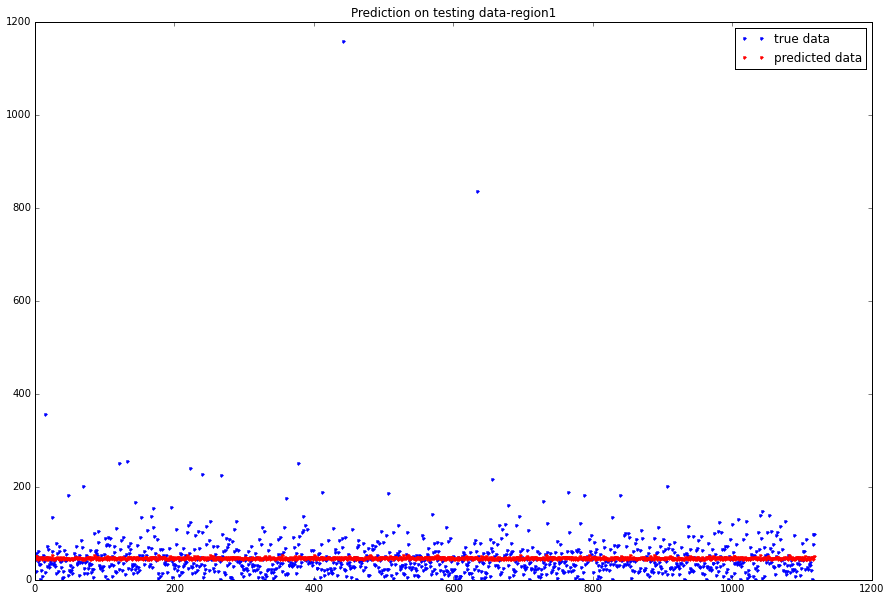

In [464]:
plt.figure(figsize=(15,10))
plt.plot(BTU2[0],'.b')
plt.plot(predict[0],'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region1')

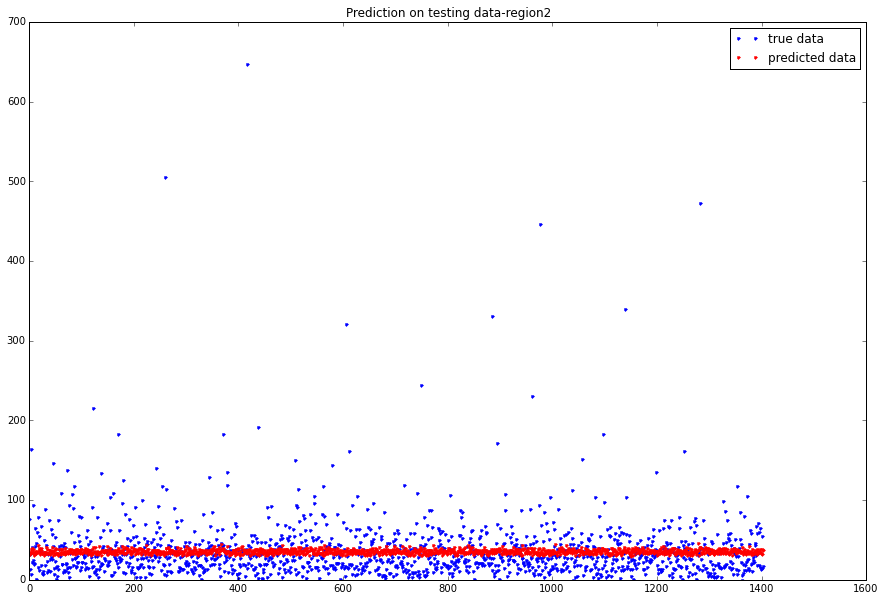

In [547]:
plt.figure(figsize=(15,10))
plt.plot(BTU2[1],'.b')
plt.plot(predict[1],'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region2')

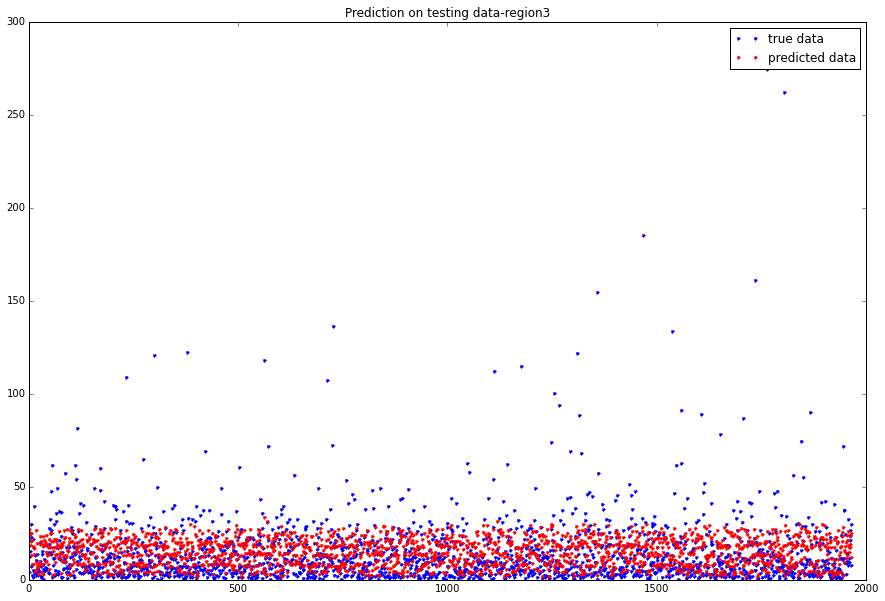

In [548]:
plt.figure(figsize=(15,10))
plt.plot(BTU2[2],'.b')
plt.plot(predict[2],'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region3')

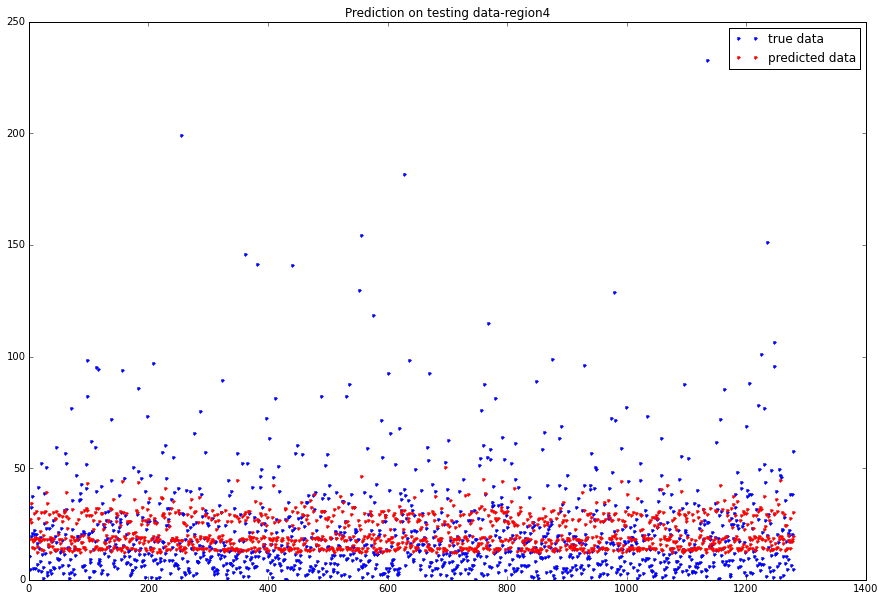

In [549]:
plt.figure(figsize=(15,10))
plt.plot(BTU2[3],'.b')
plt.plot(predict[3],'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region4')

In [550]:
cod=[]
for i in xrange(4):
    actual=BTU2[i]
    pre=predict[i]
    print st
    total=0
    for i in xrange(len(actual)):
        total=total+actual[i]
    mean=total/len(actual)
    ave=[]
    for i in xrange(len(actual)):
        ave.append(mean)
    b=actual-ave
    result=1-np.dot(st,st)/np.dot(b,b)
    cod.append(result)

[ -7.67424053  -1.03947159 -13.57623265 ...,  26.36382449  35.45359468
  -7.81762999]
[ -7.67424053  -1.03947159 -13.57623265 ...,  26.36382449  35.45359468
  -7.81762999]
[ -7.67424053  -1.03947159 -13.57623265 ...,  26.36382449  35.45359468
  -7.81762999]
[ -7.67424053  -1.03947159 -13.57623265 ...,  26.36382449  35.45359468
  -7.81762999]


In [551]:
print cod

[0.81059745347118284, 0.72499079352072726, 0.024617899170992219, 0.033482348368235493]


In [552]:
betamatrix

[array([  3.69329244e+01,   1.76738731e-03,  -1.92370373e-02]),
 array([  2.55245174e+01,   1.79870057e-03,  -5.94086629e-02]),
 array([ 1.53797224,  0.00521777,  0.01636196]),
 array([  9.79708403e+00,   3.43185832e-03,   1.08308699e-02])]

Task 3 expoential regression model

In [553]:
LBTU1=[]
LBTU2=[]
for i in xrange(4):
    LBTU1.append(np.log(BTU1[i]))
    LBTU2.append(np.log(BTU2[i]))

In [554]:
betamatrix1=[]
for i in xrange(4):
    designmatrix=designmatrix_test(AGE1[i],H1[i])
    result=np.linalg.inv(np.dot(designmatrix.T,designmatrix)).dot(designmatrix.T).dot(LBTU1[i])
    betamatrix1.append(result)

In [555]:
print betamatrix1

[array([  3.32414138e+00,   4.02599124e-05,   6.90682053e-04]), array([  2.70056626e+00,   8.26106879e-05,   6.95841153e-04]), array([  9.01251795e-01,   4.72430381e-04,   3.50929508e-03]), array([  2.06032006e+00,   1.68067914e-04,   1.45600846e-03])]


In [556]:
predict1=[]
for i in xrange(4):
    DesignMatrixtest=designmatrix_test(AGE2[i],H2[i])
    result=np.dot(DesignMatrixtest,betamatrix1[i])
    predict1.append(result)

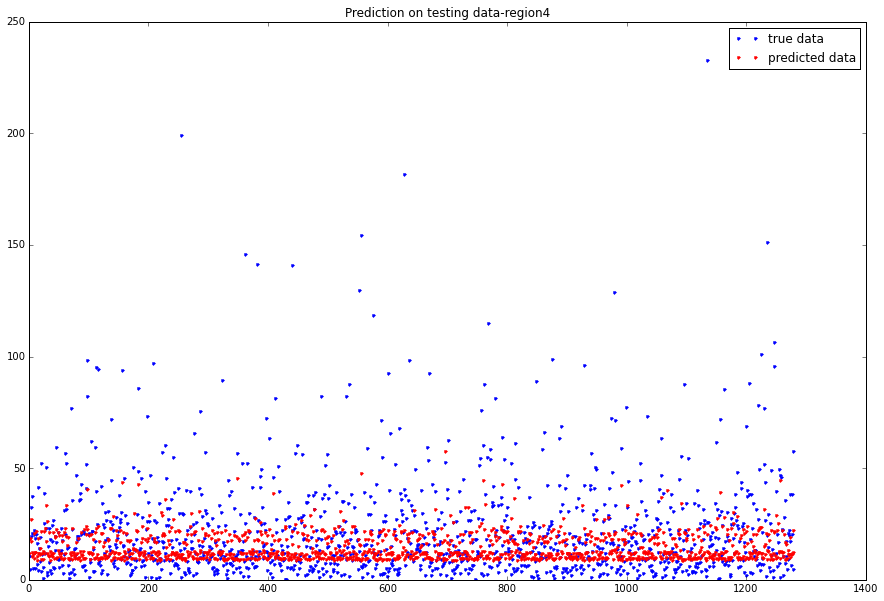

In [476]:
plt.figure(figsize=(15,10))
plt.plot(BTU2[3],'.b')
pre1=np.exp(predict1[])
plt.plot(pre1,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data-region2')

In [557]:
for i in xrange(4):
    actual=BTU2[i]
    pre=np.exp(predict1[i])
    st=actual-pre
    total=0
    for i in xrange(len(actual)):
        total=total+actual[i]
    mean=total/len(actual)
    ave=[]
    for i in xrange(len(actual)):
        ave.append(mean)
    b=actual-ave
    result=1-np.dot(st,st)/np.dot(b,b)
    print result

-0.0700783975118
-0.0830243355413
0.0226866585863
0.0334823483682
